## 테슬라 주가
테슬라 업데이트된 주가 데이터 세트
- 9/30/2019 to 4/11/2022

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [38]:
matplotlib inline

In [39]:
from mpl_toolkits.mplot3d import Axes3D
import datetime as dt
import plotly.graph_objects as go
import plotly.express as px


In [40]:
df = pd.read_csv('/home/leejieun/workspace/kaggle-notebooks/datasets/jillanisofttech/tesla-stock-price/TSLA.csv')

In [41]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2019-09-30,48.796001,47.222000,48.599998,48.174000,29399000.0,48.174000
1,2019-10-01,49.189999,47.826000,48.299999,48.938000,30813000.0,48.938000
2,2019-10-02,48.930000,47.886002,48.658001,48.625999,28157000.0,48.625999
3,2019-10-03,46.896000,44.855999,46.372002,46.605999,75422500.0,46.605999
4,2019-10-04,46.956001,45.613998,46.321999,46.285999,39975000.0,46.285999


In [42]:
df.shape

(639, 7)

In [43]:
df.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       639 non-null    object 
 1   High       639 non-null    float64
 2   Low        639 non-null    float64
 3   Open       639 non-null    float64
 4   Close      639 non-null    float64
 5   Volume     639 non-null    float64
 6   Adj Close  639 non-null    float64
dtypes: float64(6), object(1)
memory usage: 35.1+ KB


In [44]:
df['Date'] = pd.to_datetime(df['Date'])

In [45]:
df.isna().sum()

Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [46]:
df.describe().round(2)

,Date,High,Low,Open,Close,Volume,Adj Close
count,639,639.00,639.00,639.00,639.00,6.390000e+02,639.00
mean,2021-01-03 22:14:05.070422528,543.36,517.88,531.00,531.30,4.819130e+07,531.30
min,2019-09-30 00:00:00,46.90,44.86,45.96,46.29,9.800600e+06,46.29
25%,2020-05-18 12:00:00,170.26,162.38,167.35,164.78,2.392195e+07,164.78
50%,2021-01-05 00:00:00,620.41,595.50,603.88,605.13,3.448900e+07,605.13
75%,2021-08-23 12:00:00,796.58,767.74,779.45,781.30,6.329725e+07,781.30
max,2022-04-11 00:00:00,1243.49,1217.00,1234.41,1229.91,3.046940e+08,1229.91
std,NaN,340.84,325.40,333.53,333.36,3.579030e+07,333.36


In [47]:
df.nunique().sort_values()

High         633
Open         633
Low          635
Close        638
Volume       638
Adj Close    638
Date         639
dtype: int64

In [48]:
df.duplicated().sum()

0

In [49]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

In [50]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Year,Month
0,2019-09-30,48.796001,47.222000,48.599998,48.174000,29399000.0,48.174000,2019,9
1,2019-10-01,49.189999,47.826000,48.299999,48.938000,30813000.0,48.938000,2019,10
2,2019-10-02,48.930000,47.886002,48.658001,48.625999,28157000.0,48.625999,2019,10
3,2019-10-03,46.896000,44.855999,46.372002,46.605999,75422500.0,46.605999,2019,10
4,2019-10-04,46.956001,45.613998,46.321999,46.285999,39975000.0,46.285999,2019,10


<Axes: xlabel='Date', ylabel='High'>

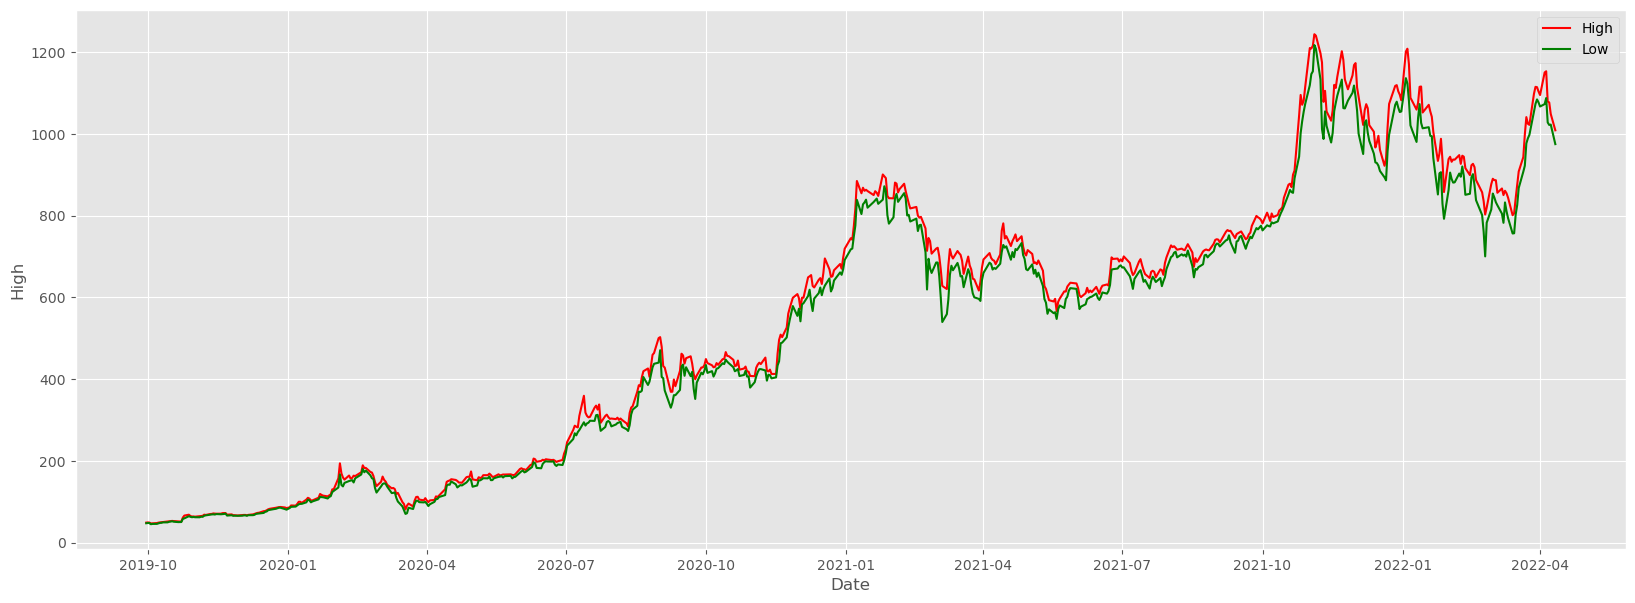

In [51]:
plt.figure(figsize=(20,7))
sns.lineplot(data=df, x='Date', y='High', color='red', label='High')
sns.lineplot(data=df, x='Date', y='Low', color='green', label='Low')


<Axes: xlabel='Date', ylabel='Volume'>

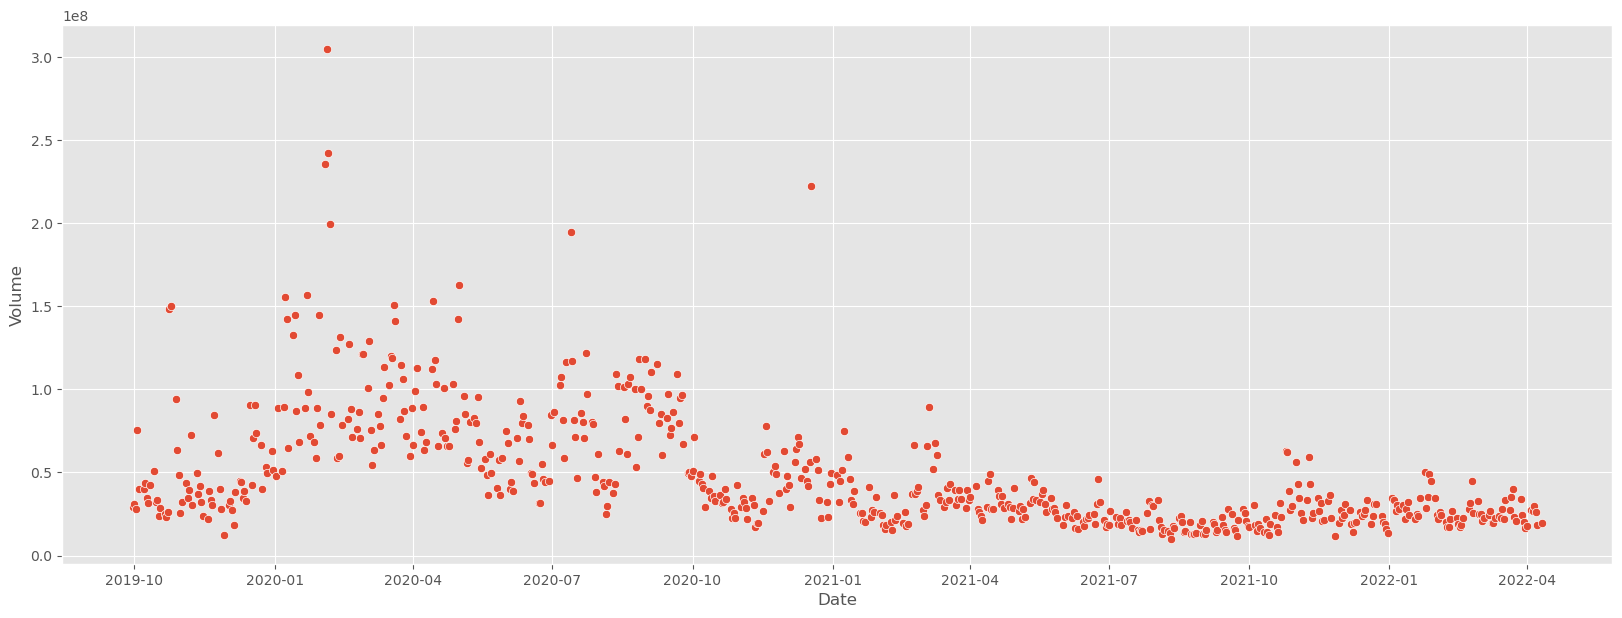

In [52]:
plt.figure(figsize=(20,7))
sns.scatterplot(data=df, x='Date', y='Volume')


In [54]:
a = df.groupby('Year')[['High','Low','Open', 'Close']].mean().round(2)
a

,High,Low,Open,Close
Year,,,,
2019,65.61,63.69,64.49,64.81
2020,297.29,280.70,289.11,290.00
2021,795.73,762.71,779.84,779.99
2022,974.00,921.28,948.64,947.23


<Axes: xlabel='Year'>

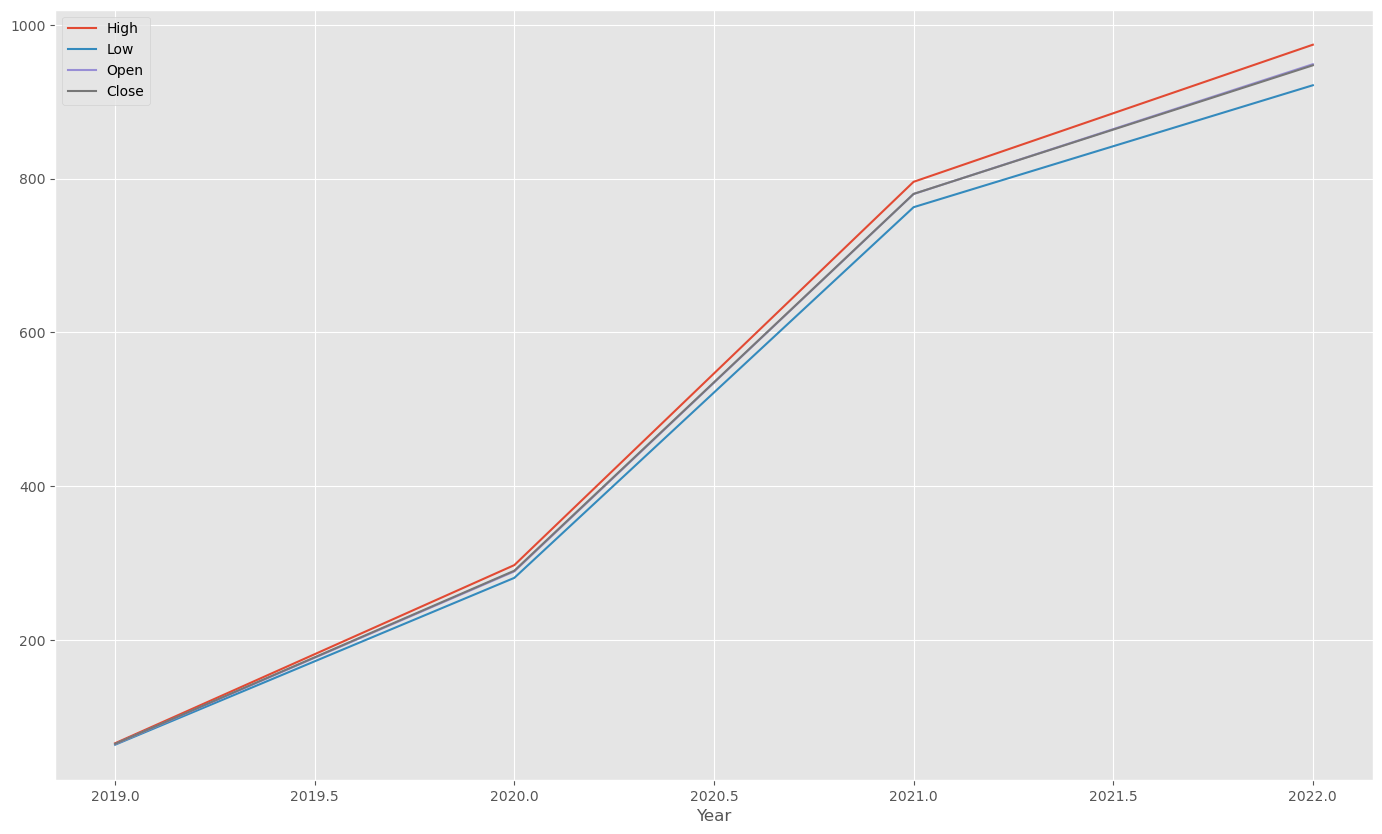

In [55]:
a.plot(figsize=(17,10))